# Project : Investigate a TMDb Movie Dataset 

 ## Table of Contents
* Introduction
* Data Wrangling
* Exploratory Data Analysis
* Conclusions

# Introduction

I have selected TMDB movies dataset. In this dataset i am going on a specific genre, I will explore movies that labeled Drama. Since some movies have multiple labels in genres column, I will analysis only that  movies that are labeled Drama. I will be answering following questions
* Most Popular Star cast in the movies
* Directors who have directed maximum movies
*  Top Drama movies that make more earning.
* least earning Drama movie.
*  I will analyze the years wise average_vote_count.
Profit trends of Drama movies.
* Average Runtime of Drama Movies.


# Importing the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Now this code load the dataset

In [2]:
df_imdb = pd.read_csv('tmdb_movies.csv')
df_imdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Data Wrangling

1.checking the shape of the dataset and information about the dataset what i have in the dataset.

In [3]:
df_imdb.shape

(10866, 21)

In [4]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Data Cleaning 
* I can see that some columns are not usefull for my analysis so i am going to drop it.
* Dataset  is not clean it will effect the analysis so clean the dataset.

In [5]:
df_imdb.drop(['imdb_id','homepage','tagline','keywords','overview'],axis=1,inplace=True)

In [6]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


 I have to check null value in the dataset.

In [7]:
df_imdb.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Now i am checking my 30 row of data so i get a clera picture of the dataset.

In [8]:
df_imdb.head(30)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


Here i can see that budget and revenue columns has zero value so i am going to count it because it'll effect in my analysis.

In [10]:
print(df_imdb[df_imdb['budget']==0].shape[0])
print(df_imdb[df_imdb['revenue']==0].shape[0])

5696
6016


I can't fill this with mean value. it'll effect the analysis.so i have to choose the particular 
"GENRES"
it has a multiple  genres in one column based on Dataset in genres columns i will choose one of them and perform the analysis.

In [11]:
df_imdb['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10866, dtype: object

I have choosen the Drama genre.

In [12]:
Drama = df_imdb['genres'].isin(['Drama'])
df_drama = df_imdb[Drama].copy()

In [13]:
df_drama.shape

(712, 16)

In [14]:
df_drama.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
55,295964,2.584264,20000000,36606743,Burnt,Bradley Cooper|Sienna Miller|Lily James|Alicia...,John Wells,100,Drama,Double Feature Films|PeaPie Films|3 Arts Enter...,10/2/15,631,6.3,2015,1.839999e+07,3.367819e+07
58,306819,2.557859,15000000,64191523,The Danish Girl,Eddie Redmayne|Alicia Vikander|Matthias Schoen...,Tom Hooper,120,Drama,Pretty Pictures|Working Title Films|ArtÃ©mis P...,11/27/15,867,7.3,2015,1.379999e+07,5.905618e+07
68,312221,2.331567,35000000,137935567,Creed,Michael B. Jordan|Sylvester Stallone|Graham Mc...,Ryan Coogler,133,Drama,New Line Cinema|Warner Bros.|Metro-Goldwyn-May...,11/25/15,1171,7.3,2015,3.219999e+07,1.269007e+08
77,321741,2.121884,35000000,48623572,Concussion,Will Smith|Bitsie Tulloch|Gugu Mbatha-Raw|Alec...,Peter Landesman,123,Drama,Village Roadshow Pictures|Scott Free Productio...,11/12/15,500,6.9,2015,3.219999e+07,4.473367e+07
96,298382,1.823130,11930000,18340000,The Dressmaker,Kate Winslet|Liam Hemsworth|Caroline Goodall|J...,Jocelyn Moorhouse,118,Drama,Amazon Studios|Film Art Media|Apollo Media,10/1/15,197,6.9,2015,1.097560e+07,1.687279e+07


In [15]:
df_drama.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 55 to 10824
Data columns (total 16 columns):
id                      712 non-null int64
popularity              712 non-null float64
budget                  712 non-null int64
revenue                 712 non-null int64
original_title          712 non-null object
cast                    711 non-null object
director                711 non-null object
runtime                 712 non-null int64
genres                  712 non-null object
production_companies    639 non-null object
release_date            712 non-null object
vote_count              712 non-null int64
vote_average            712 non-null float64
release_year            712 non-null int64
budget_adj              712 non-null float64
revenue_adj             712 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 94.6+ KB


I have production_companies columns with null values so i'll simply drop it.

In [16]:
df_drama.dropna(inplace=True)

In [17]:
df_drama.shape

(638, 16)

Now my data is preety clean but i have to check it duplicate value and others things.

In [18]:
sum(df_drama.duplicated())

0

Now i don't have duplicate values and now i am replacing the zero in Budget and Revenue columns with the mean values. 

In [19]:
df_drama['budget']=df_drama['budget'].replace(0,df_drama['budget'].mean())
df_drama['revenue']=df_drama['revenue'].replace(0,df_drama['revenue'].mean())

Checking the Budget and Revenue value == 0

In [20]:
print(df_drama[df_drama['budget']==0].shape[0])
print(df_drama[df_drama['revenue']==0].shape[0])

0
0


In [21]:
df_drama.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,638.000000,638.000000,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000,638.000000,6.380000e+02,6.380000e+02
mean,85415.592476,0.541195,1.365679e+07,3.527537e+07,112.876176,150.288401,6.352978,2003.128527,1.113141e+07,3.274770e+07
std,102041.675675,0.600310,1.470348e+07,5.504193e+07,22.926790,364.322103,0.785993,12.962297,2.065801e+07,8.556511e+07
min,14.000000,0.003731,2.500000e+01,1.300000e+01,14.000000,10.000000,3.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10709.500000,0.224578,9.019703e+06,1.492812e+07,99.000000,16.000000,5.800000,1998.000000,0.000000e+00,0.000000e+00
50%,28735.500000,0.376469,9.019703e+06,2.366528e+07,110.000000,37.000000,6.400000,2008.000000,0.000000e+00,7.495600e+03
75%,147061.750000,0.647506,1.182250e+07,2.366528e+07,123.000000,121.000000,6.900000,2013.000000,1.400037e+07,2.024603e+07
max,361671.000000,8.947905,1.300000e+08,6.118994e+08,336.000000,5923.000000,8.400000,2015.000000,1.519551e+08,7.064045e+08


### I have plot hist plot and see the implotant point.

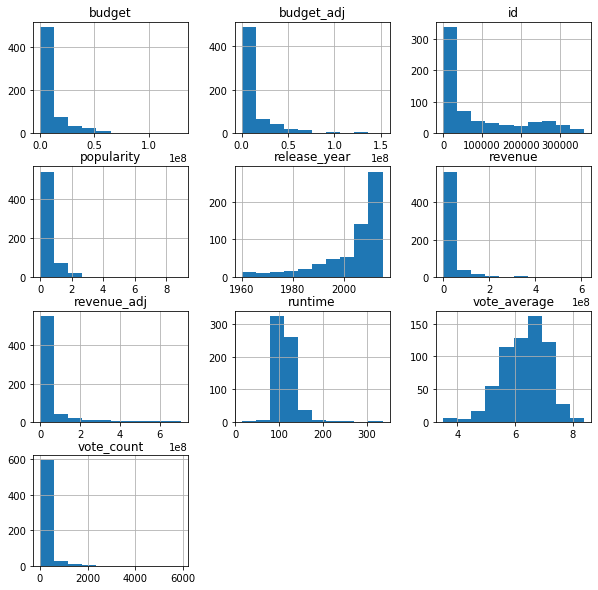

In [22]:
df_drama.hist(figsize=(10,10));

In [23]:
num_col = df_drama.dtypes[df_drama.dtypes != 'object'].index

Plot heatmap to observe their correlation coefficients.

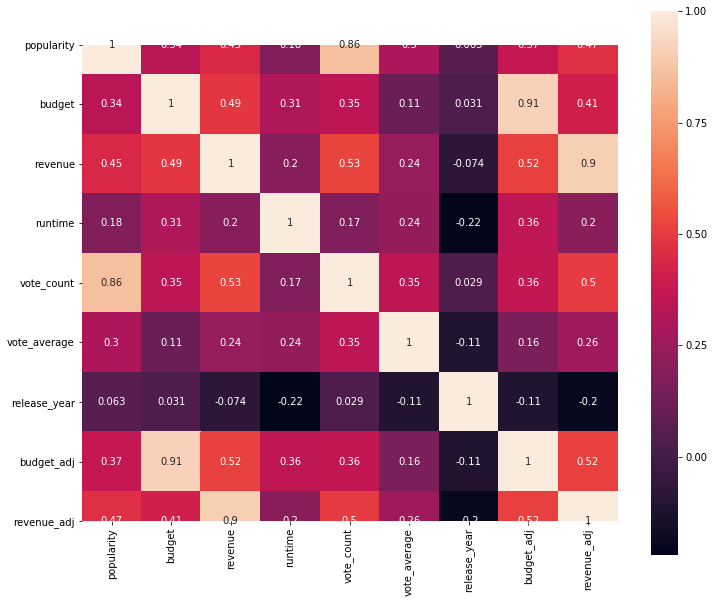

In [24]:
plt.figure(figsize = (12,10))
corr = df_drama[num_col[1:]].corr()
sns.heatmap(corr,annot = True,square = True)

### 1. Most Popular Star cast in the movies.

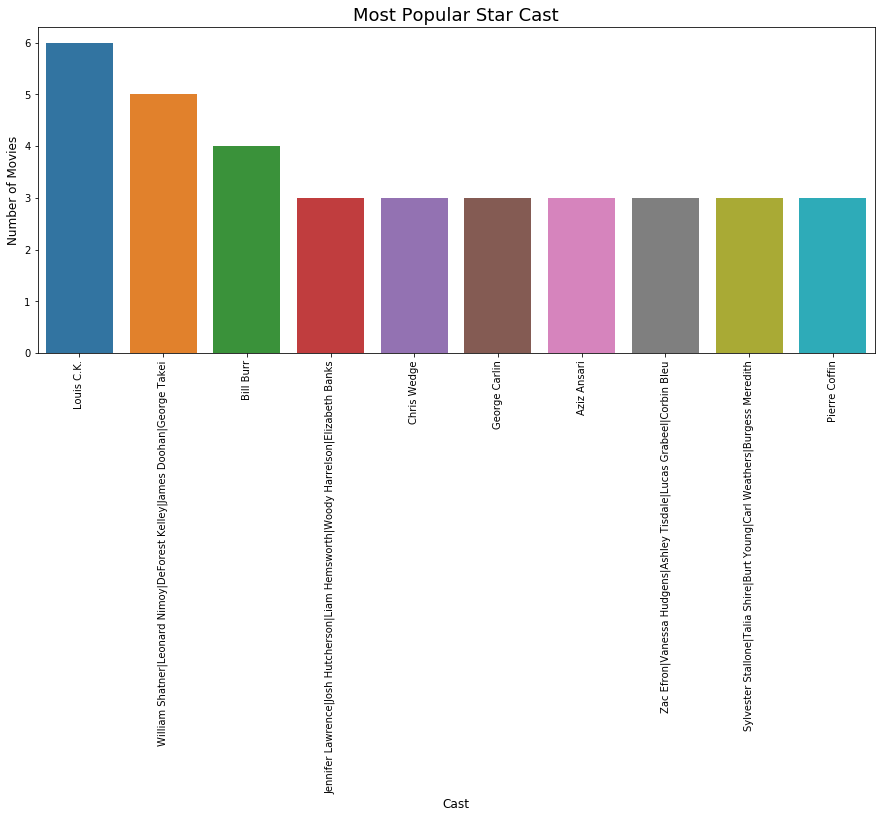

In [25]:
plt.figure(figsize = (15,6));
sns.barplot(x = df_imdb['cast'].value_counts()[0:10].index,
            y = df_imdb['cast'].value_counts()[0:10].values);
plt.xticks(rotation = 90);
plt.xlabel('Cast', fontsize = 12);
plt.ylabel("Number of Movies", fontsize = 12);
plt.title("Most Popular Star Cast", fontsize = 18);

### 2. Directors who have directed maximum movies

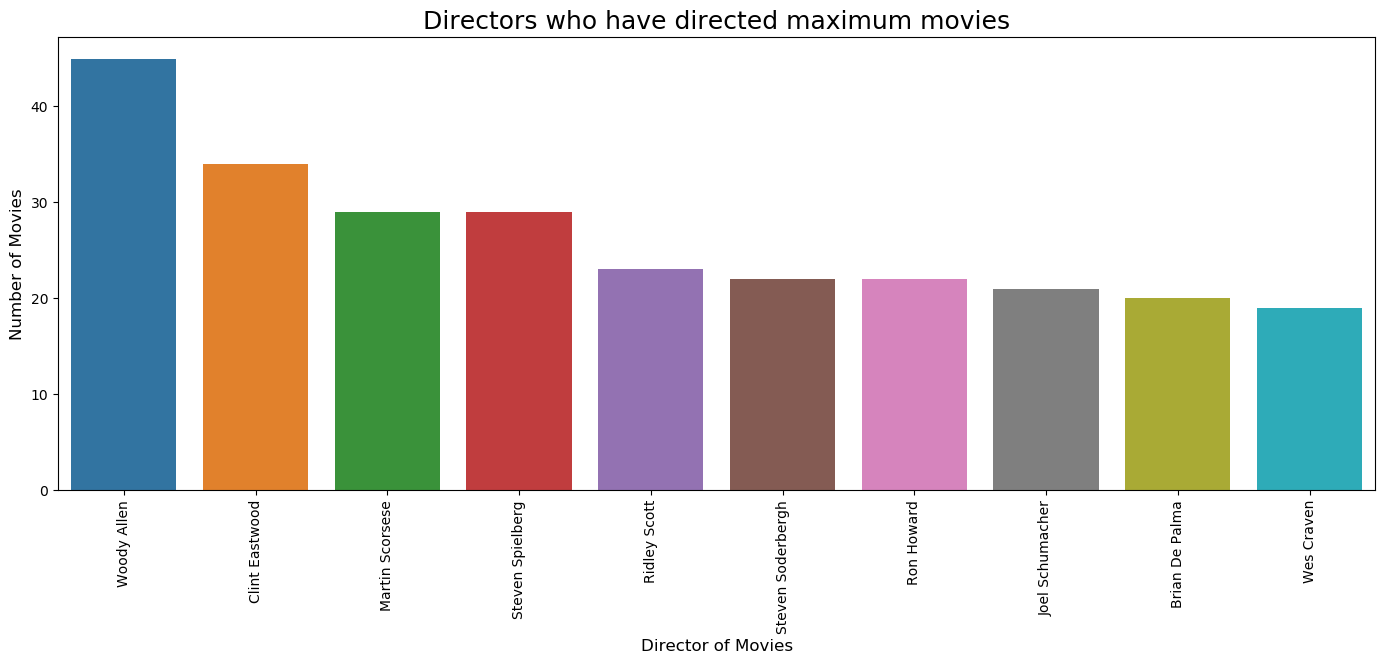

In [26]:
plt.figure(figsize = (17,6),dpi = 100);
sns.barplot(x = df_imdb['director'].value_counts()[0:10].index,
            y = df_imdb['director'].value_counts()[0:10].values);
plt.xticks(rotation = 90);
plt.xlabel('Director of Movies', fontsize = 12);
plt.ylabel("Number of Movies", fontsize = 12);
plt.title("Directors who have directed maximum movies",fontsize = 18);

**I have to calculate the profit and loss of the Movies and add it in the dataset.**

In [27]:
df_drama.insert(4,'Porfit_and_loss',df_drama['revenue'] - df_drama['budget'])

In [28]:
df_drama.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 55 to 10824
Data columns (total 17 columns):
id                      638 non-null int64
popularity              638 non-null float64
budget                  638 non-null float64
revenue                 638 non-null float64
Porfit_and_loss         638 non-null float64
original_title          638 non-null object
cast                    638 non-null object
director                638 non-null object
runtime                 638 non-null int64
genres                  638 non-null object
production_companies    638 non-null object
release_date            638 non-null object
vote_count              638 non-null int64
vote_average            638 non-null float64
release_year            638 non-null int64
budget_adj              638 non-null float64
revenue_adj             638 non-null float64
dtypes: float64(7), int64(4), object(6)
memory usage: 89.7+ KB


### 3. Profit trends of Drama movies

This Graph shows the profit trends year wise for this trend i have used line char show this it will easy to understand.

### I have written a function which help me to ploting a line graph and i have to make a line plot for two more analysis so it'll me to reuse this function again. 

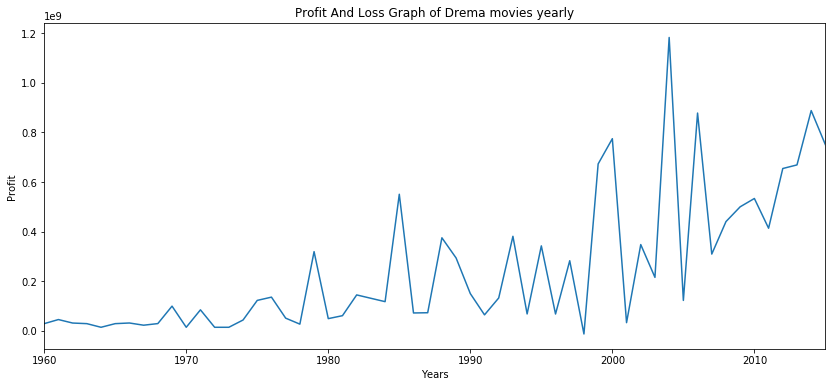

In [29]:
graph=df_drama.groupby('release_year')['Porfit_and_loss'].sum()
def fig_fun(data,title,xlabel,ylabel):
    graph.plot(kind='line',figsize=(14,6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
fig_fun(graph,title='Profit And Loss Graph of Drama movies yearly',xlabel='Years',ylabel='Profit')


In this graph i clearly saw that profit of the Drama movie is increase with respect to the years.

### 4. Average Vote Given by the user to Drama Movies
For this analysis i have used line chart.

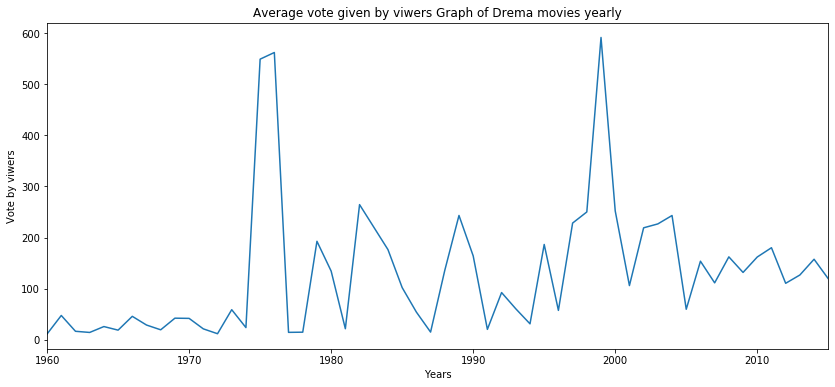

In [30]:
graph=df_drama.groupby('release_year')['vote_count'].mean()
fig_fun(graph,'Average vote given by viwers Graph of Drama movies yearly','Years','Vote by viwers')


Average vote given by the user for Drama Movies is nearly 200 for each movies. 

### 5. Average Run Time of Drama Movies

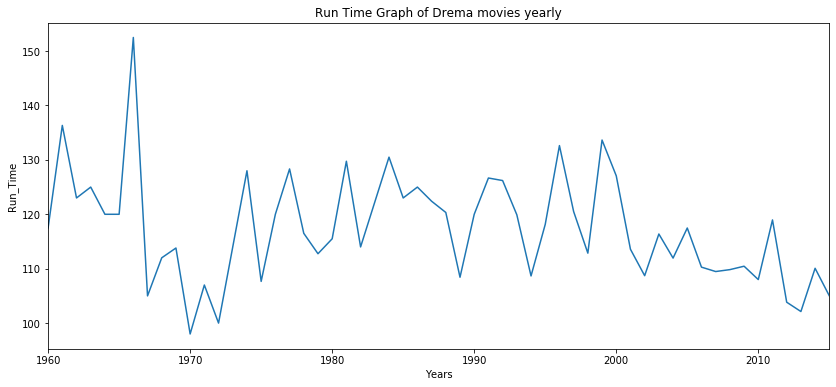

In [31]:
graph=df_drama.groupby('release_year')['runtime'].mean()
fig_fun(graph,'Run Time Graph of Drama movies yearly','Years','Run_Time')

Average Runtime of the Drama movies is nearly 2 hours.

Text(0, 0.5, 'Popularity')

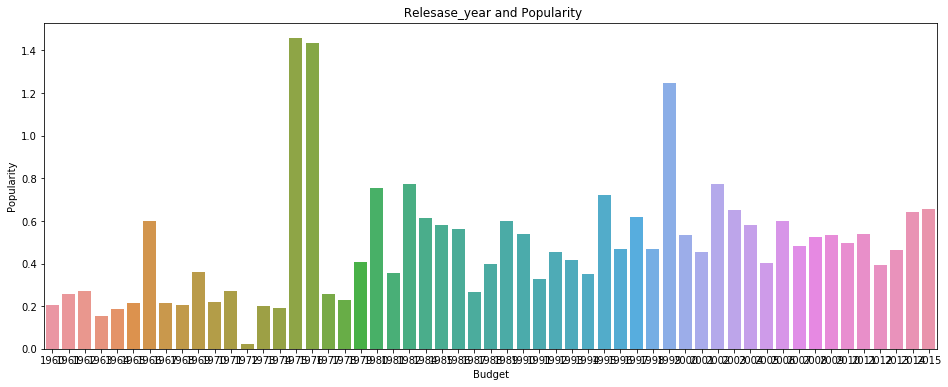

In [32]:
plt.figure(figsize=(16,6))
sns.barplot( x = df_drama['release_year'],y = df_drama['popularity'],ci = None, data=df_drama)
plt.title(' Relesase_year and Popularity')
plt.xlabel('Budget')
plt.ylabel('Popularity')

**Top Drama movies that make higest money.**

In [33]:
df_drama['Porfit_and_loss'].max()  

581899420.0

Now i will take near to higest value for top profit movies

In [34]:
df_drama.query('Porfit_and_loss>45000000').sort_values('budget',ascending=False).head(5)

,id,popularity,budget,revenue,Porfit_and_loss,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8730,2133,0.583320,120000000.0,325756637.0,205756637.0,The Perfect Storm,George Clooney|Mark Wahlberg|Diane Lane|John C...,Wolfgang Petersen,130,Drama,Warner Bros.|Baltimore Spring Creek Production...,3/15/00,315,5.9,2000,1.519551e+08,4.125031e+08
5013,2289,0.875248,79000000.0,173013509.0,94013509.0,Cold Mountain,Jude Law|Nicole Kidman|RenÃ©e Zellweger|Eileen...,Anthony Minghella,154,Drama,Miramax Films|Mirage Enterprises|Castel Film R...,12/24/03,299,6.5,2003,9.364286e+07,2.050820e+08
6676,1125,0.647700,70000000.0,154937680.0,84937680.0,Dreamgirls,Jamie Foxx|BeyoncÃ© Knowles|Eddie Murphy|Danny...,Bill Condon,134,Drama,Paramount Pictures|DreamWorks SKG|Laurence Mar...,12/25/06,146,6.5,2006,7.571684e+07,1.675913e+08
2429,345,1.329827,65000000.0,162091208.0,97091208.0,Eyes Wide Shut,Tom Cruise|Nicole Kidman|Madison Eginton|Jacki...,Stanley Kubrick,159,Drama,Hobby Films|Pole Star|Stanley Kubrick Producti...,7/14/99,623,6.8,1999,8.508844e+07,2.121860e+08
1973,38167,1.271623,60000000.0,204594016.0,144594016.0,Eat Pray Love,Julia Roberts|James Franco|Javier Bardem|Billy...,Ryan Murphy,133,Drama,Columbia Pictures|Red Om Films|Plan B Entertai...,8/12/10,407,5.7,2010,6.000000e+07,2.045940e+08


TOP 5 movies that makes high profit.

**least Earing Drama movies.**

In [35]:
df_drama.query('Porfit_and_loss>45000000').sort_values('budget',ascending=True).head(5)

,id,popularity,budget,revenue,Porfit_and_loss,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10174,1366,2.389663,1100000.0,117235147.0,116135147.0,Rocky,Sylvester Stallone|Talia Shire|Burt Young|Carl...,John G. Avildsen,119,Drama,United Artists,11/21/76,963,7.2,1976,4.214868e+06,4.492097e+08
492,323272,0.731022,3000000.0,67790117.0,64790117.0,War Room,Priscilla C. Shirer|T.C. Stallings|Karen Aberc...,Alex Kendrick,120,Drama,Provident Films|Affirm Films|Kendrick Brothers...,8/28/15,57,6.9,2015,2.759999e+06,6.236688e+07
9805,510,3.258151,3000000.0,108981275.0,105981275.0,One Flew Over the Cuckoo's Nest,Jack Nicholson|Louise Fletcher|Danny DeVito|Wi...,MiloÅ¡ Forman,133,Drama,Fantasy Films|Warner Bros.,11/18/75,1612,8.0,1975,1.215546e+07,4.415726e+08
4967,153,1.765322,4000000.0,119723856.0,115723856.0,Lost in Translation,Bill Murray|Scarlett Johansson|Anna Faris|Giov...,Sofia Coppola,102,Drama,American Zoetrope,8/31/03,1135,7.3,2003,4.741411e+06,1.419150e+08
6998,1640,1.539729,6500000.0,98410061.0,91910061.0,Crash,Sandra Bullock|Don Cheadle|Matt Dillon|Michael...,Paul Haggis,112,Drama,Blackfriars Bridge Films|Yari Film Group|Bob Y...,5/28/04,675,7.1,2004,7.503895e+06,1.136090e+08


**In this section i have draw the graph for Profit loss and Popularity.**

# Conclusions


* In Drama movies profit is increase yars wise.
* In the vote count the  and  got the high vote and in b/w it is min. vote.
* In average runtime graph there graph is decline for a short times and increase overall trend are nearabout 2 hours long..
* Drama with largest budget are not necessari that movies perform good.
* Drama with largest profit and loss are not necessari that popular.